# Setup

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [2]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [4]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

In [5]:
file_list = glob.glob('./experiments/configs/*amazon*.json')

configs = [json.load(open(file)) for file in file_list]

In [6]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [7]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x15191763c6a0>],

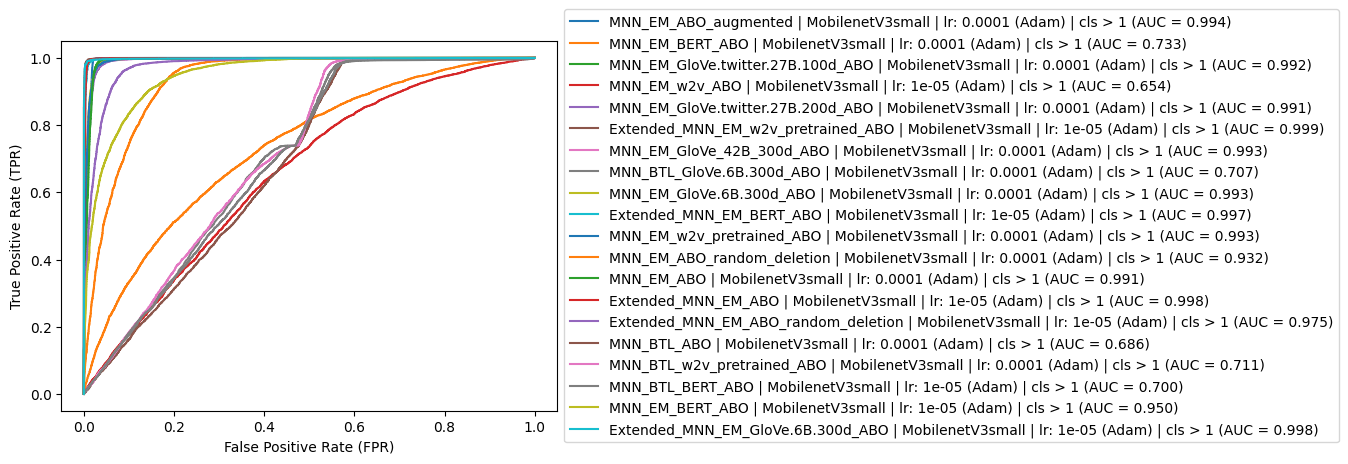

In [8]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x151914d9b940>],

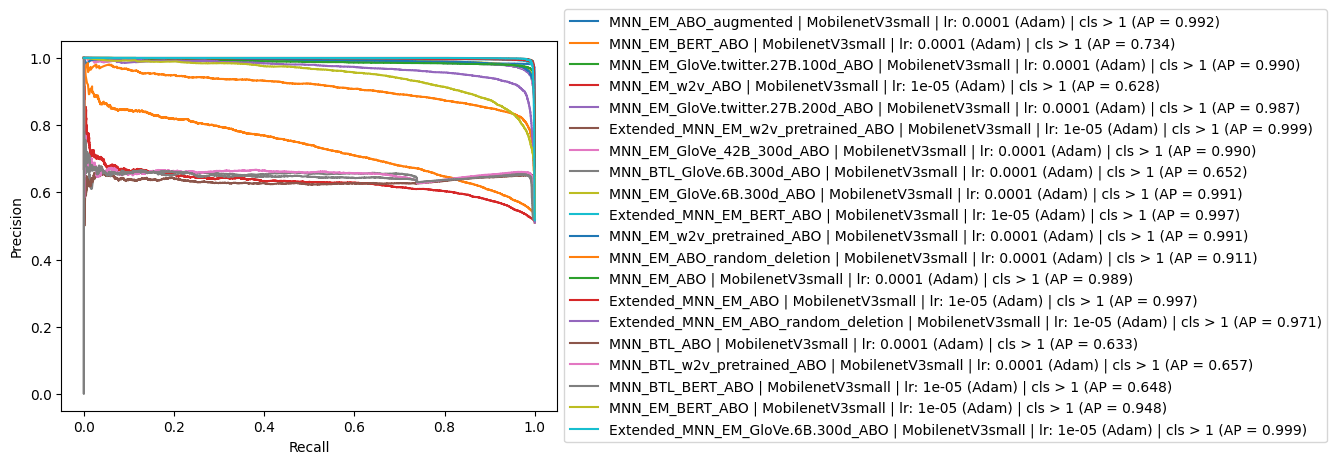

In [9]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [10]:
import pandas as pd

In [19]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])

# MNN-EM

In [17]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,MNN_EM_ABO_augmented,MobilenetV3small,Adam,0.00010,1,0.993903,0.992309,0.986693,0.573455,0.987112,0.973471,0.573455,0.987112,0.979145,0.996581,0.987786,4.782390e-01,0.987138
12,MNN_EM_ABO,MobilenetV3small,Adam,0.00010,1,0.991360,0.988667,0.978022,0.293328,0.978474,0.956186,0.293328,0.978474,0.969139,0.990140,0.979527,2.746557e-01,0.978474
8,MNN_EM_GloVe.6B.300d_ABO,MobilenetV3small,Adam,0.00010,1,0.993016,0.991028,0.974582,0.608821,0.974842,0.949246,0.608821,0.974842,0.968108,0.983739,0.975861,6.061707e-01,0.974842
6,MNN_EM_GloVe_42B_300d_ABO,MobilenetV3small,Adam,0.00010,1,0.992812,0.990027,0.972440,0.471156,0.972886,0.945042,0.471156,0.972886,0.963438,0.985047,0.974123,4.711556e-01,0.972886
10,MNN_EM_w2v_pretrained_ABO,MobilenetV3small,Adam,0.00010,1,0.993060,0.990976,0.972571,0.801223,0.972705,0.945166,0.801223,0.972705,0.964583,0.983492,0.973946,6.683847e-01,0.972645
2,MNN_EM_GloVe.twitter.27B.100d_ABO,MobilenetV3small,Adam,0.00010,1,0.992483,0.990334,0.970912,0.382101,0.971281,0.941945,0.382101,0.971281,0.963431,0.981827,0.972542,3.821009e-01,0.971281
4,MNN_EM_GloVe.twitter.27B.200d_ABO,MobilenetV3small,Adam,0.00010,1,0.990910,0.986781,0.969498,0.610937,0.969735,0.939059,0.610937,0.969735,0.964691,0.977341,0.970975,6.109368e-01,0.969735
11,MNN_EM_ABO_random_deletion,MobilenetV3small,Adam,0.00010,1,0.931960,0.911286,0.874926,0.427140,0.879531,0.756354,0.427140,0.879531,0.824731,0.968516,0.890859,2.817021e-01,0.879036
18,MNN_EM_BERT_ABO,MobilenetV3small,Adam,0.00001,1,0.949817,0.947926,0.879413,0.191397,0.880933,0.759535,0.191397,0.880933,0.847724,0.937408,0.890313,6.445700e-02,0.878792
1,MNN_EM_BERT_ABO,MobilenetV3small,Adam,0.00010,1,0.733426,0.734146,0.669253,0.000062,0.669085,0.340775,0.000002,0.673784,0.613937,0.888083,0.725992,6.524963e-11,0.648329


# Extended MNN-EM

In [18]:
metrics_df[metrics_df["Model name"].str.startswith("Extended_MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
5,Extended_MNN_EM_w2v_pretrained_ABO,MobilenetV3small,Adam,0.00001,1,0.999107,0.999359,0.992691,0.808076,0.992746,0.985385,0.808076,0.992746,0.991054,0.995395,0.993220,0.726751,0.992746
19,Extended_MNN_EM_GloVe.6B.300d_ABO,MobilenetV3small,Adam,0.00001,1,0.998310,0.998714,0.990997,0.789868,0.990900,0.981995,0.789868,0.990900,0.992502,0.989990,0.991244,0.781464,0.990900
13,Extended_MNN_EM_ABO,MobilenetV3small,Adam,0.00001,1,0.997729,0.997415,0.990199,0.876642,0.990248,0.980406,0.876642,0.990248,0.988249,0.993121,0.990679,0.870976,0.990248
9,Extended_MNN_EM_BERT_ABO,MobilenetV3small,Adam,0.00001,1,0.996862,0.996616,0.987303,0.710683,0.987337,0.974611,0.710683,0.987337,0.986075,0.989690,0.987879,0.710683,0.987337
14,Extended_MNN_EM_ABO_random_deletion,MobilenetV3small,Adam,0.00001,1,0.975119,0.970694,0.936174,0.649181,0.936833,0.872928,0.649181,0.936833,0.916953,0.963245,0.939529,0.614683,0.936763


# MNN-BTL

In [21]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_BTL")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
16,MNN_BTL_w2v_pretrained_ABO,MobilenetV3small,Adam,0.00010,1,0.711292,0.656510,0.669736,-0.234286,0.724216,0.435230,-0.264634,0.727965,0.658442,0.987285,0.790009,-0.280241,0.727251
15,MNN_BTL_ABO,MobilenetV3small,Adam,0.00010,1,0.686229,0.633044,0.649479,-0.346517,0.718945,0.417049,-0.471757,0.719660,0.650697,0.994158,0.786569,-0.482337,0.719600
7,MNN_BTL_GloVe.6B.300d_ABO,MobilenetV3small,Adam,0.00010,1,0.706824,0.652453,0.659235,-0.347651,0.715357,0.419416,-0.368301,0.720238,0.653061,0.982360,0.784558,-0.379667,0.719583
17,MNN_BTL_BERT_ABO,MobilenetV3small,Adam,0.00001,1,0.700063,0.648118,0.653637,-0.254172,0.714541,0.412742,-0.335613,0.717040,0.649379,0.988202,0.783738,-0.410422,0.716683


# All models

In [22]:
metrics_df.sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
5,Extended_MNN_EM_w2v_pretrained_ABO,MobilenetV3small,Adam,0.00001,1,0.999107,0.999359,0.992691,0.808076,0.992746,0.985385,0.808076,0.992746,0.991054,0.995395,0.993220,7.267509e-01,0.992746
19,Extended_MNN_EM_GloVe.6B.300d_ABO,MobilenetV3small,Adam,0.00001,1,0.998310,0.998714,0.990997,0.789868,0.990900,0.981995,0.789868,0.990900,0.992502,0.989990,0.991244,7.814637e-01,0.990900
13,Extended_MNN_EM_ABO,MobilenetV3small,Adam,0.00001,1,0.997729,0.997415,0.990199,0.876642,0.990248,0.980406,0.876642,0.990248,0.988249,0.993121,0.990679,8.709760e-01,0.990248
9,Extended_MNN_EM_BERT_ABO,MobilenetV3small,Adam,0.00001,1,0.996862,0.996616,0.987303,0.710683,0.987337,0.974611,0.710683,0.987337,0.986075,0.989690,0.987879,7.106832e-01,0.987337
0,MNN_EM_ABO_augmented,MobilenetV3small,Adam,0.00010,1,0.993903,0.992309,0.986693,0.573455,0.987112,0.973471,0.573455,0.987112,0.979145,0.996581,0.987786,4.782390e-01,0.987138
12,MNN_EM_ABO,MobilenetV3small,Adam,0.00010,1,0.991360,0.988667,0.978022,0.293328,0.978474,0.956186,0.293328,0.978474,0.969139,0.990140,0.979527,2.746557e-01,0.978474
8,MNN_EM_GloVe.6B.300d_ABO,MobilenetV3small,Adam,0.00010,1,0.993016,0.991028,0.974582,0.608821,0.974842,0.949246,0.608821,0.974842,0.968108,0.983739,0.975861,6.061707e-01,0.974842
6,MNN_EM_GloVe_42B_300d_ABO,MobilenetV3small,Adam,0.00010,1,0.992812,0.990027,0.972440,0.471156,0.972886,0.945042,0.471156,0.972886,0.963438,0.985047,0.974123,4.711556e-01,0.972886
10,MNN_EM_w2v_pretrained_ABO,MobilenetV3small,Adam,0.00010,1,0.993060,0.990976,0.972571,0.801223,0.972705,0.945166,0.801223,0.972705,0.964583,0.983492,0.973946,6.683847e-01,0.972645
2,MNN_EM_GloVe.twitter.27B.100d_ABO,MobilenetV3small,Adam,0.00010,1,0.992483,0.990334,0.970912,0.382101,0.971281,0.941945,0.382101,0.971281,0.963431,0.981827,0.972542,3.821009e-01,0.971281
